## 統計解析
### 統計解析の種類
- 記述統計
    - 集めたデータの特徴を掴んだりわかりやすく整理したり見やすくする
    - ex. 平均・標準偏差などを計算しデータの特徴を計算・分類・図示する
- 推論統計
    - 集めたデータから推論
    - ランダムに抽出した一部を対象にしらべ、母集団の特徴を推論する
    - 全人口の年齢別身長を調べるためにランダムに抽出
    - 部分的なデータしかないものから確率分布に基づいたモデルを用いて精密な解析を行う
    - 過去のデータから未来予測する

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

# 線形解析分析用ライブラリ
from sklearn import linear_model

In [2]:
# データの読み込み
# CSV形式・データベースとしてデータを扱うのが一般的
# 研究用データであればzip形式で提供されていることも

In [3]:
pwd

'/Users/hgsgtk/src/github.com/hgsgtk/py-snippets/jupyter-py-basic'

In [4]:
mkdir chap3

mkdir: chap3: File exists


In [5]:
cd ./chap3

/Users/hgsgtk/src/github.com/hgsgtk/py-snippets/jupyter-py-basic/chap3


In [6]:
pwd

'/Users/hgsgtk/src/github.com/hgsgtk/py-snippets/jupyter-py-basic/chap3'

In [7]:
import requests, zipfile
from io import StringIO
import io

download_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"
r = requests.get(download_url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [8]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [9]:
student_data_math = pd.read_csv('student-mat.csv')
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [10]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
?pd.read_csv

In [12]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### 変数について
- Pythonの変数
    - データを格納するための機能
- データ解析における変数
    - 対象データにおいて変化する値を示す
    - ex. 目的変数・説明変数
   

In [13]:
cat student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

### データの分類
- 量的データ
    - 四則演算適用可能な連続値で表現される
    - ex. 人数・金額
- 質的データ
    - 四則演算適用不可能な不連続のデータ
    - 状態を表現するために利用
    - ex. 順位・カテゴリ
    

In [14]:
# 質的データの例 性別
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [15]:
# 量的データの例 欠席数
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [16]:
# 性別を軸とした年齢の平均値
student_data_math.groupby('sex')['age'].mean()
student_data_math.groupby('sex')['G1'].mean()

sex
F    10.620192
M    11.229947
Name: G1, dtype: float64

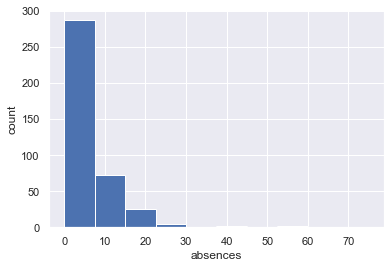

In [17]:
# ヒストグラム
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [18]:
# 要約統計量の計算
# ex. 中央値・平均・標準偏差
print('平均値：', student_data_math['absences'].mean())
print('中央値：', student_data_math['absences'].median())
print('最頻値：', student_data_math['absences'].mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64


In [19]:
# 分散
# 分散: データの散らばりの度合いを表す値
# 分散 = 偏差（それぞれの数値と平均値の差）を二乗し、平均を取る
# See also https://sci-pursuit.com/math/statistics/variance.html
student_data_math['absences'].var()

64.050

In [20]:
# 標準偏差
# データのちらばりの度合いを示す値
# 分散の正の平方根
# データが平均値に集中していれば標準偏差は小さくなる、広がっていれば大きくなる
# See also https://sci-pursuit.com/math/statistics/standard-deviation.html
student_data_math['absences'].std()
np.sqrt(student_data_math['absences'].var())

8.003095687108177

In [21]:
# 要約統計量
student_data_math['absences'].describe()
# 四分位範囲（75%タイルと25%タイルの差）
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [22]:
# 全部の要約統計量
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


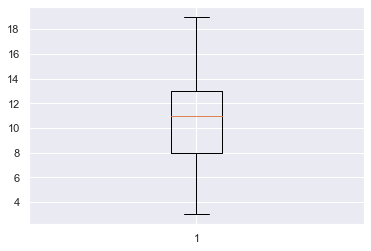

In [23]:
# 箱ひげ図：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

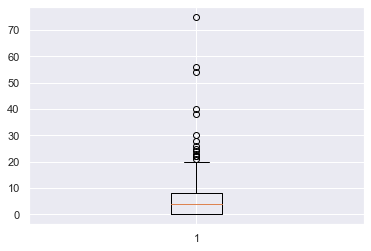

In [24]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

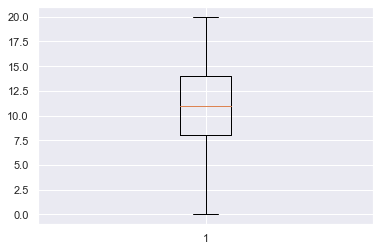

In [25]:
# 箱ひげ図：G3
plt.boxplot(student_data_math['G3'])
plt.grid(True)

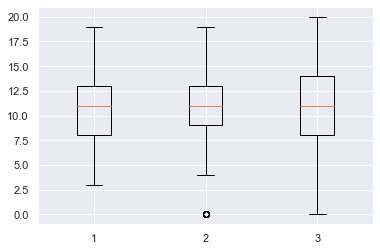

In [26]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [27]:
# 変動係数
# 標準偏差を平均値で割った値、スケールに依存せず、比較できるようになる
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

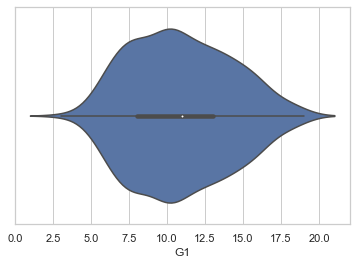

In [28]:
# バイオリン図
# See also http://pynote.hatenablog.com/entry/seaborn-violin-plot
sns.set(style='whitegrid')
sns.violinplot(x=student_data_math['G1'])

In [29]:
# 変動変数
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

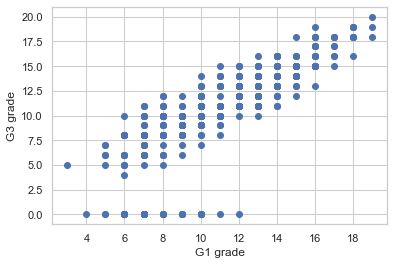

In [30]:
# 散布図・相関係数
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [31]:
# 共分散
# 共分散: 2組の変数の偏差の積の平均値
# 共分散が正 = 一方の値が増加するともう一方の値が増加する傾向にある = 正の相関
# 逆の場合は、負の相関
# See also https://sci-pursuit.com/math/statistics/covariance.html
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [32]:
print('G1 variance: ', student_data_math['G1'].var())
print('G3 variance: ', student_data_math['G3'].var())

G1 variance:  11.017053267364899
G3 variance:  20.989616397866737


In [33]:
# 相関係数
# 共分散は各変数のスケール・単位に依存する
# スケールの影響を受けずに2つの変数の関係を数値化する
# -1から1までの値を取り、1に近いほど正の相関があり、-1に近いほど負の相関がある。
# 0に近い場合は無相関であると言える
# 相関関数 = ピアソン関数
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])
# この数値が高いから因果関係があるかというとそうではない
# 因果関係の把握には実験計画法と呼ばれるアプローチを使う
# https://ja.wikipedia.org/wiki/%E5%AE%9F%E9%A8%93%E8%A8%88%E7%94%BB%E6%B3%95

(0.801467932017414, 9.001430312277865e-90)

In [34]:
# 相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

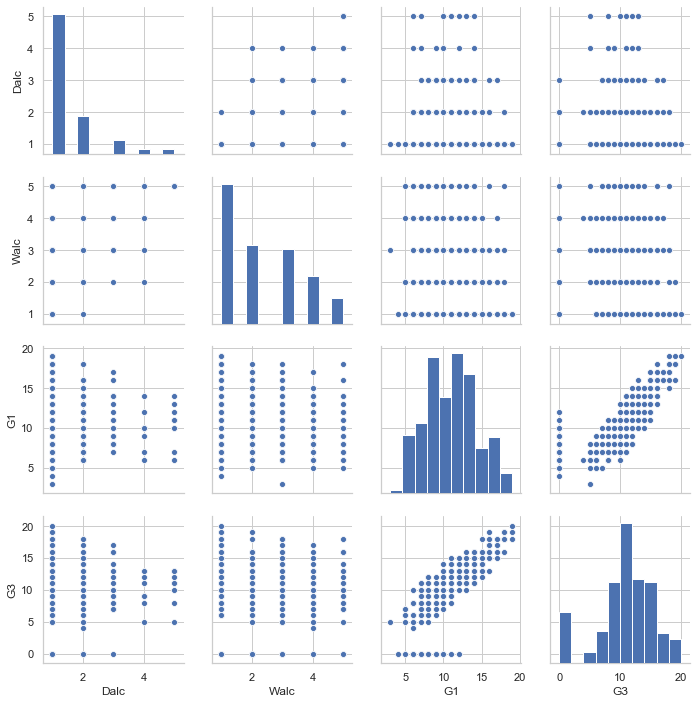

In [35]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [36]:
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

In [37]:
# 練習問題3-1
# student-por.csvを読み込んで要約統計量を表示する

student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.head()
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [38]:
# 練習問題3-2
# 数学・ポルトガルデータをマージする
# 両方にデータが含まれているデータを対象にする = 内部結合
# 要約統計量を計算する
merged = pd.merge(
    student_data_math,
    student_data_por,
    on=([
        'school',
        'sex',
        'age',
        'address',
        'famsize',
        'Pstatus',
        'Medu',
        'Fedu',
        'Mjob',
        'Fjob',
        'reason',
        'nursery',
        'internet'
    ]),
    suffixes=('_math', '_por')
)
merged.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


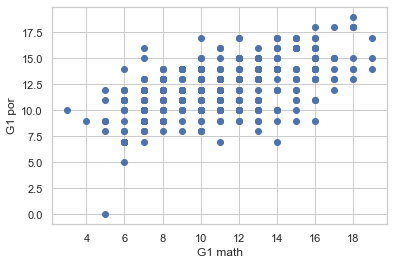

In [39]:
# 練習問題3-3
# 散布図とヒストグラムを作成してみる
# 散布図
plt.plot(merged['G1_math'], merged['G1_por'], 'o')
plt.xlabel('G1 math')
plt.ylabel('G1 por')
plt.grid(True)

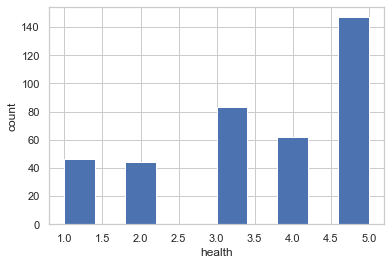

In [40]:
# ヒストグラム
plt.hist(merged['health_por'])

plt.xlabel('health')
plt.ylabel('count')

plt.grid(True)

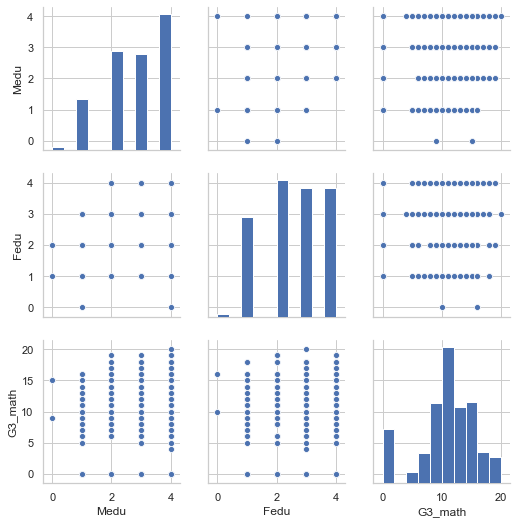

In [41]:
sns.pairplot(merged[['Medu', 'Fedu', 'G3_math']])
plt.grid(True)

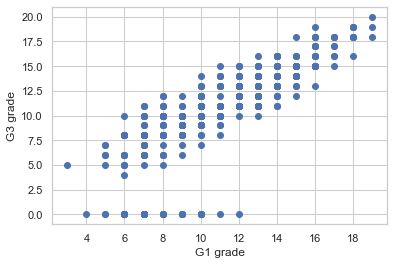

In [42]:
# 3-4 単回帰分析
# 回帰分析: 数値予測

plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

# 回帰問題 与えられたdataから関係式を仮定、dataに最も当てはまる係数を求める
# G1の成績をもとにG3の成績を予測
# 目的となる変数 G3の成績 を目的変数と呼ぶ
# 説明する変数 G1の成績 を説明変数と呼ぶ
# 単回帰分析 インプットが1変数
# 重回帰分析 インプットが2変数以上

In [43]:
# 線形単回帰分析
# Output・Inputが線形の関係に成り立つ
from sklearn import linear_model

# 線形回帰のインスタンス作成
reg = linear_model.LinearRegression()
# fit関数: 最小二乗法
# See also https://mathtrain.jp/leastsquares
X = student_data_math.loc[:, ['G1']].values
Y = student_data_math['G3'].values
reg.fit(X, Y)
print('回帰係数: ', reg.coef_)
print('切片: ', reg.intercept_)

回帰係数:  [1.106]
切片:  -1.6528038288004616


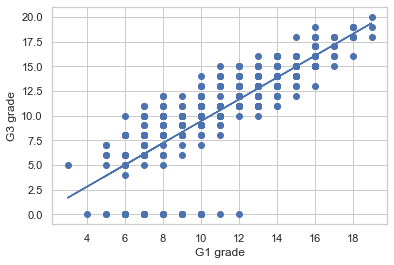

In [44]:
plt.scatter(X, Y)

plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [45]:
# 決定係数
# 客観的に実測値をうまく予測しているかどうかを判断するための数値
# 寄与率とも呼ばれる
# See also https://xica.net/magellan/marketing-idea/stats/about-coefficient-of-determination/
print('決定係数: ', reg.score(X, Y))

決定係数:  0.64235084605227


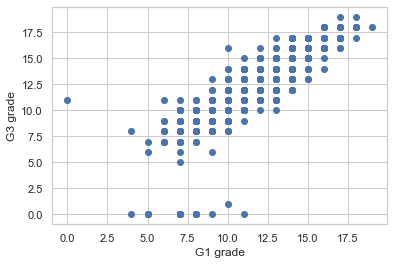

In [47]:
# 練習問題3-4
# student-por.csvを使って、G3を目的変数、G1を説明変数として単回帰分析を実施
# 回帰係数・切片・決定係数を求めよ

plt.plot(student_data_por['G1'], student_data_por['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [50]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
X = student_data_por.loc[:, ['G1']].values
Y = student_data_por['G3'].values
reg.fit(X, Y)
print('回帰係数：', reg.coef_)
print('切片:', reg.intercept_)
print('決定係数', reg.score(X, Y))

回帰係数： [0.973]
切片: 0.8203984121064565
決定係数 0.6829156800171085


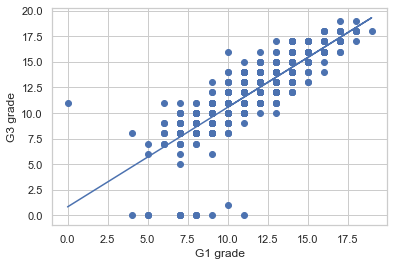

In [53]:
# 練習問題3-5
plt.scatter(X, Y)

plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [56]:
# 練習問題3-6
from sklearn import linear_model

reg = linear_model.LinearRegression()
X = student_data_por.loc[:, ['absences']].values
Y = student_data_por['G3'].values
reg.fit(X, Y)
print('回帰係数：', reg.coef_)
print('切片:', reg.intercept_)
print('決定係数', reg.score(X, Y))

回帰係数： [-0.064]
切片: 12.138800862687443
決定係数 0.008350131955637385


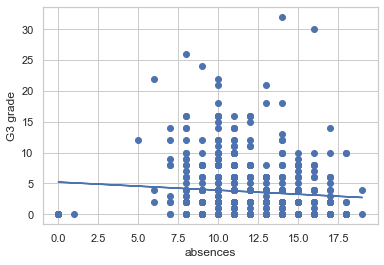

In [55]:
plt.scatter(X, Y)

plt.xlabel('absences')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

# この2つの影響関係は薄い